{'k': 1.5, 'D': 0.2, 'v': 1, 'tau': 0.8, 'R': 0.3, 'label': 'default'}

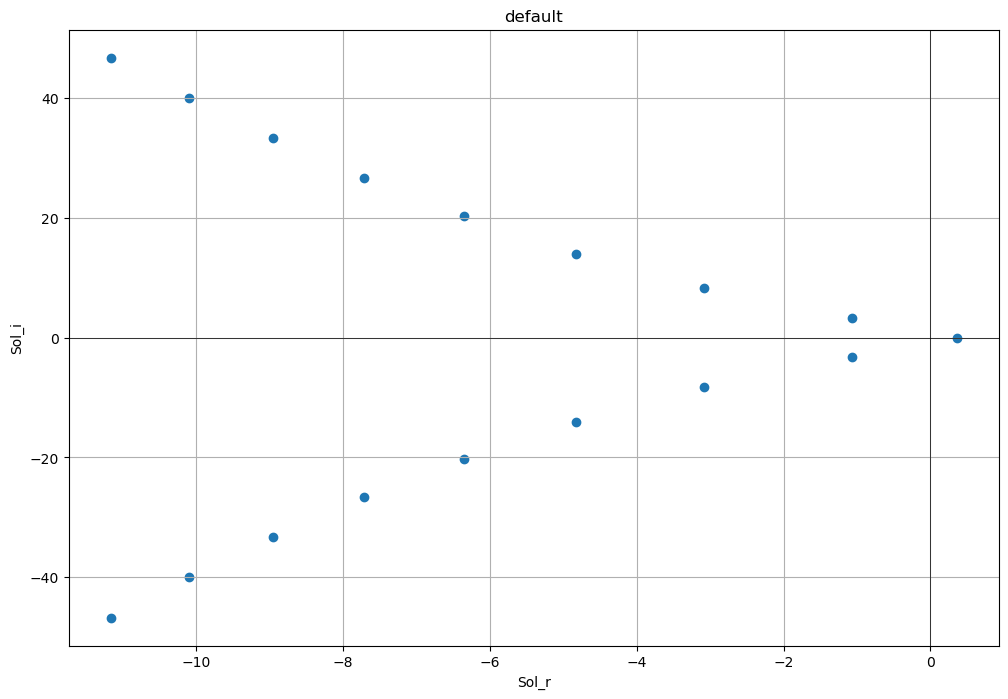

{'par': {'k': 1.5; 'D': 0.2; 'v': 1; 'tau': 0.8; 'R': 0.3; 'label': 'default'}; 'guess_range': ([-20; 5; 5]; [0; 50; 25]); 'tols': (1e-09; 1e-06; 4)}


In [1]:
import os
import numpy as np
from functions import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
import scipy.signal as signal
import scipy.linalg as lina
import matplotlib.cm as cm
# Get the viridis colormap
# my_cmap = cm.get_cmap('viridis')


# Get the directory where the current script is located
script_directory = os.getcwd()

# Change the current working directory to the script's directory
os.chdir(script_directory)

# Now the CWD is the same as the script's directory
# print("New Current Working Directory:", os.getcwd())

default_pars = obtain_default_pars('pars_list.csv')
# display(default_pars)

pars_list = create_custom_pars_list('pars_list.csv')
par = default_pars
# par = pars_list[0] # between 0 - 3; 1 is good; 3 to compare
display(par)

path_maker = par['label']
path = f"CSV/{path_maker}.csv"

if not os.path.exists(path):
    guess = {
        'guess_range_real':[-20,5,5],
        'guess_range_imag':[0,50,25]
    }
    save_dataframe_to_csv(*find_eig(par, **guess, round_sig_digits=4, tol_is_sol=1e-6, max_iter=200), 'CSV')
# else:
    # print("Solution has already been saved in the appropriate location.")

df, label, metadata = plot_single_df(
        path, filter=True,
        real_lower_bound=-40, real_upper_bound=5, imag_lower_bound=-500, imag_upper_bound=500
)
n_lambdas = len(df)
# display(df.head(n_lambdas))

from scipy.integrate import quad

lambdas = []
for index, row in df.head(n_lambdas).iterrows():
    l = complex(row['Sol_r'], row['Sol_i'])
    # print(f'lambda_{index+1} = {l}')
    lambdas.append(l)

normal_coefs = []
for n in range(n_lambdas):
    l = lambdas[n]
    
    i_phi = quad(eig_fun_mul_0,0,1,args=(par, l),complex_func=True)[0]
    b_phi = np.sqrt(1/i_phi)
    
    i_psi = quad(eig_fun_mul_1,0,1,args=(par, l, [b_phi, 1]),complex_func=True)[0]
    b_psi = (1/i_psi)
    
    b = (b_phi, b_psi.conjugate())
    normal_coefs.append(b)
    
    # print(f'normal_coef_phi_{n+1} = {complex(round(normal_coefs[n][0].real,4),round(normal_coefs[n][0].imag,4))}')
    # print(f'normal_coef_psi_{n+1} = {complex(round(normal_coefs[n][1].real,4),round(normal_coefs[n][1].imag,4))}')
    # print()

In [2]:
from scipy.integrate import solve_ivp
import plotly.graph_objs as go

N_zeta = 100
zeta = np.linspace(0,1,N_zeta)
dz = zeta[1]
phi_1_0 = init_cond_func_1(zeta)
phi_2_0 = init_cond_func_2(zeta, par)
x0 = np.array([phi_1_0, phi_2_0])

In [3]:
t_end = 30
N_t_d = 30

r_ctrl = 100
q_ctrl = 0.05
u_limits = [0,0.35]
y_limits = [-0.2,0.2]

n_modes=3
N=10

In [4]:
t_eval_d = np.linspace(0,t_end,N_t_d+1)
s = 2/t_eval_d[1]
# G, S, S_u = G_S_Su(zeta, s, par, q_ctrl, N, r_ctrl, lambdas, n_modes, normal_coefs)
print(f't_eval_d = {t_eval_d[0]}, {t_eval_d[1]}, ... , {t_eval_d[-1]}')
# find_smallest_r(G, r_ctrl, 0, 5*r_ctrl)

t_eval_d = 0.0, 1.0, ... , 30.0


N = 1
        q_ctrl = 1, r_ctrl = 335.97. Ratio = 335.97
N = 2
        q_ctrl = 1, r_ctrl = 671.95. Ratio = 671.95
N = 3
        q_ctrl = 1, r_ctrl = 1209.43. Ratio = 1209.43
N = 4
        q_ctrl = 1, r_ctrl = 1590.97. Ratio = 1590.97
N = 5
        q_ctrl = 1, r_ctrl = 1749.66. Ratio = 1749.66
N = 6
        q_ctrl = 1, r_ctrl = 1794.90. Ratio = 1794.90
N = 7
        q_ctrl = 1, r_ctrl = 1801.31. Ratio = 1801.31
N = 8
        q_ctrl = 1, r_ctrl = 1872.60. Ratio = 1872.60
N = 9
        q_ctrl = 1, r_ctrl = 1931.01. Ratio = 1931.01
N = 10
        q_ctrl = 1, r_ctrl = 1939.55. Ratio = 1939.55
N = 11
        q_ctrl = 1, r_ctrl = 1999.75. Ratio = 1999.75
N = 12
        q_ctrl = 1, r_ctrl = 2053.38. Ratio = 2053.38
N = 13
        q_ctrl = 1, r_ctrl = 2061.93. Ratio = 2061.93
N = 14
        q_ctrl = 1, r_ctrl = 2110.52. Ratio = 2110.52
N = 15
        q_ctrl = 1, r_ctrl = 2156.86. Ratio = 2156.86
N = 16
        q_ctrl = 1, r_ctrl = 2164.86. Ratio = 2164.86
N = 17
        q_ctrl = 1, r_ctrl = 2

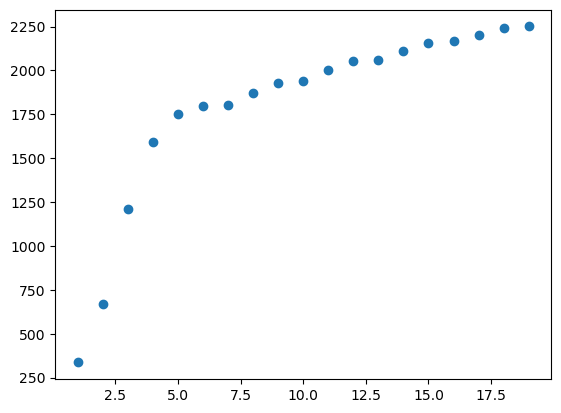

In [7]:
q_ctrl = 1
rrr = []
for N in range(1,20,1):
    print(f'N = {N}')
    G = G_S_Su(zeta, s, par, q_ctrl, N, 0, lambdas, n_modes, normal_coefs)[0]
    r_ctrl = find_smallest_r(G, 0, 0, 10*q_ctrl)
    print(f'        q_ctrl = {q_ctrl}, r_ctrl = {r_ctrl:.2f}. Ratio = {(r_ctrl/q_ctrl):.2f}')
    rrr.append(r_ctrl)
plt.scatter(range(1,20,1), rrr)

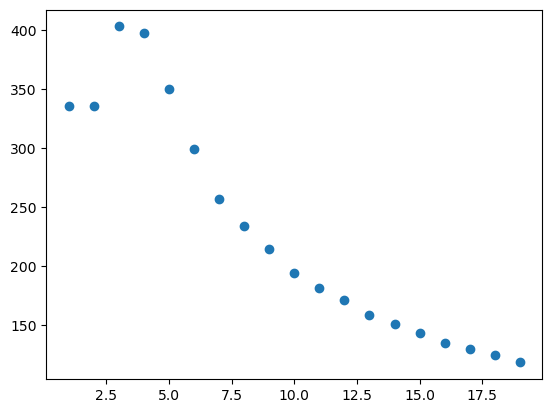

In [9]:
plt.scatter(range(1,20,1), rrr/np.array(range(1,20,1)))

In [ ]:
N = 10
q_ctrl = 0.01
r_ctrl = 25
G = G_S_Su(zeta, s, par, q_ctrl, N, r_ctrl, lambdas, n_modes, normal_coefs)[0]
r_ctrl = find_smallest_r(G, 0, 0, 10*q_ctrl)
print(f'        q_ctrl = {q_ctrl}, r_ctrl = {r_ctrl:.2f}. Ratio = {(r_ctrl/q_ctrl):.2f}')      

In [ ]:
is_positive_definite(G_r(G_0, 1.75*r_ctrl))

In [ ]:
find_smallest_r(G, r_ctrl, 0, 5*r_ctrl)

In [ ]:
if is_positive_definite(G):
    print(f'Case 1: G with r, q = {(r_ctrl, q_ctrl)} is positive definite.')
    if is_positive_definite(G_r(G, -r_ctrl)):
        print(f'Case 2: G with r, q = {(0, q_ctrl)} is positive definite.')
    else:
        r_ctrl_new = find_smallest_r(G, r_ctrl, 0, r_ctrl, tol=0.05)
        print(f'Case 3: G with r, q = {(r_ctrl_new, q_ctrl)} is positive definite.')
else:
    r_ctrl_new = find_smallest_r(G, r_ctrl, 0, 5*r_ctrl, tol=0.05)
    print(f'Case 4: G with r, q = {(r_ctrl_new, q_ctrl)} is positive definite.')
    


In [ ]:
r_ctrl_new = find_smallest_r(G, r_ctrl, 0, 50*r_ctrl, tol=0.01)
print(f'Case 0: G with r, q = {(r_ctrl_new, q_ctrl)} is positive definite.')

In [ ]:
is_positive_definite(G_r(G, 0.1-r_ctrl))

In [7]:
np.round(G_0[:,0],2)

In [5]:
# N = 10
# q_ctrl = 0.01
# r_ctrl = 20
G, S, S_u = G_S_Su(zeta, s, par, q_ctrl, N, r_ctrl, lambdas, n_modes, normal_coefs)

In [6]:
import quadprog
x_MPC = []
U_MPC = []
results_MPC = []
x_MPC.append(x0)
for i in range(len(t_eval_d)):
    G, a, C, b, meq = MPC_matrix_build(
            x_MPC[i], s, par, 
            lambdas, normal_coefs, q_ctrl, G, S, S_u,
            n_modes=n_modes, N=N,
            u_limits=(0, 0.35), y_limits=(-1000, 1000)
        )
    # display(G, a, C, b, meq)
    results_MPC.append(quadprog.solve_qp(G, a, C, b, meq))
    U_MPC.append(results_MPC[i][0][0])
    x_MPC.append(A_d(x_MPC[i], s, par)[:,:,-1] + B_d(zeta, s, par, u=U_MPC[i]))
    print(f"u(t) = {results_MPC[i][0][0]:.4f} obtained at t = {t_eval_d[i] + t_eval_d[1]:.2f} s")

x_MPC = np.transpose(np.array(x_MPC[:-1]),(1,2,0))
U_MPC = np.array([0] + U_MPC[:-1])
    

u(t) = 0.3500 obtained at t = 1.00 s
u(t) = 0.3500 obtained at t = 2.00 s
u(t) = 0.2610 obtained at t = 3.00 s
u(t) = 0.2353 obtained at t = 4.00 s
u(t) = 0.2165 obtained at t = 5.00 s
u(t) = 0.1998 obtained at t = 6.00 s
u(t) = 0.1839 obtained at t = 7.00 s
u(t) = 0.1698 obtained at t = 8.00 s
u(t) = 0.1562 obtained at t = 9.00 s
u(t) = 0.1441 obtained at t = 10.00 s
u(t) = 0.1329 obtained at t = 11.00 s
u(t) = 0.1222 obtained at t = 12.00 s
u(t) = 0.1130 obtained at t = 13.00 s
u(t) = 0.1038 obtained at t = 14.00 s
u(t) = 0.0960 obtained at t = 15.00 s
u(t) = 0.0882 obtained at t = 16.00 s
u(t) = 0.0815 obtained at t = 17.00 s
u(t) = 0.0750 obtained at t = 18.00 s
u(t) = 0.0691 obtained at t = 19.00 s
u(t) = 0.0638 obtained at t = 20.00 s
u(t) = 0.0586 obtained at t = 21.00 s
u(t) = 0.0543 obtained at t = 22.00 s
u(t) = 0.0498 obtained at t = 23.00 s
u(t) = 0.0461 obtained at t = 24.00 s
u(t) = 0.0423 obtained at t = 25.00 s
u(t) = 0.0391 obtained at t = 26.00 s
u(t) = 0.0360 obtaine

In [7]:
# Create z_grid and t_grid for meshgrid
z_grid, t_grid = np.meshgrid(t_eval_d, zeta)

# Create data traces for xd[0]
xd0_trace = go.Surface(x=z_grid, y=t_grid, z=x_MPC[0], colorscale='Viridis', name='xd[0]')

# Create a layout for xd[0] plot
xd0_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='xd[0]'),
        aspectmode='cube'  # Forces the plot to have equal aspect ratio for all axes
    ),
    title='xd[0] Plot',
    width=600,
    height=500,
)

# Create a figure for xd[0] plot
xd0_fig = go.Figure(data=[xd0_trace], layout=xd0_layout)

# Plot xd[0] figure
xd0_fig.show()


# Create data traces for xd[1]
xd1_trace = go.Surface(x=z_grid, y=t_grid, z=x_MPC[1], colorscale='Viridis', name='xd[1]')

# Create a layout for xd[1] plot
xd1_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='xd[1]'),
        aspectmode='cube'  # Forces the plot to have equal aspect ratio for all axes
    ),
    title='xd[1] Plot',
    width=600,
    height=500,
)

# Create a figure for xd[1] plot
xd1_fig = go.Figure(data=[xd1_trace], layout=xd1_layout)

# Plot xd[1] figure
xd1_fig.show()

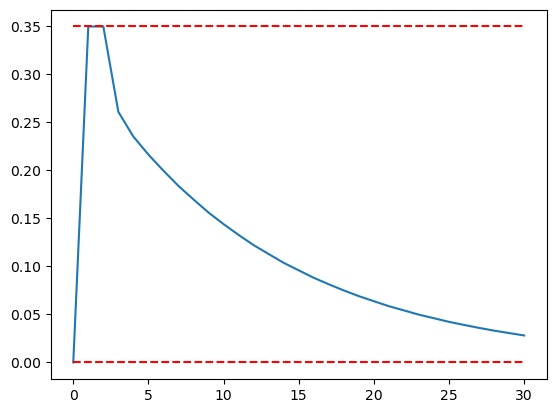

In [8]:
plt.plot(t_eval_d, U_MPC)
plt.plot(t_eval_d, np.ones_like(t_eval_d)*u_limits[0], 'r--')
plt.plot(t_eval_d, np.ones_like(t_eval_d)*u_limits[1], 'r--')


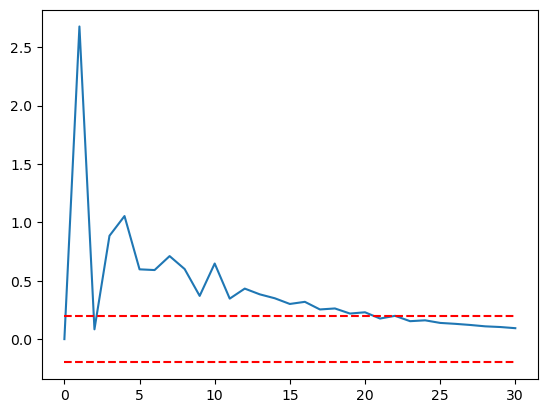

In [9]:
plt.plot(t_eval_d[:len(x_MPC[0,-1,:])], x_MPC[0,-1,:])
plt.plot(t_eval_d, np.ones_like(t_eval_d)*y_limits[0], 'r--')
plt.plot(t_eval_d, np.ones_like(t_eval_d)*y_limits[1], 'r--')
# plt.plot(t_eval_d, x_MPC[1,-1,:])
# plt.plot(t_eval_d, x_MPC[1,20,:])